# Problem Statement

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing numerous passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Task

1. To complete the analysis of what sorts of people were likely to survive. 
2. To predict which passengers survived the tragedy.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=8,6

In [2]:
titanic=pd.read_csv('train.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Petroff, Mr. Nedelio",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
def plot_histograms(df,variables,n_rows,n_cols):
    fig=plt.figure(figsize=(16,12))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title('Skew: '+ str(round(float(df[var_name].skew()))))
        ax.set_xticklabels([],visible=False)
        ax.set_yticklabels([],visible=False)
    fig.tight_layout()
    plt.show()

In [7]:
def plot_distribution(df,var,target,**kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()

In [8]:
def plot_categories(df,cat,target,**kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

In [9]:
def plot_correlation_map(df):
    corr=df.corr()
    _ , ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    _ - sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={'shrink':.9}, ax=ax, annot=True, annot_kws={'fontsize':12})


In [10]:
def describe_more(df):
    var=[]; l-[], t-[]
    for x in df:
        var.append(x)
        l.append(len(pd.value_counts(df[x])))
        t.append(df[x].dtypes)
    levels=pd.DataFrame({'Variable':var, 'Levels':l, 'Datatype':t})
    levels.sort_values(by='levels', inplace=True)
    return levels

TypeError: unsupported operand type(s) for -: 'Figure' and 'AxesSubplot'

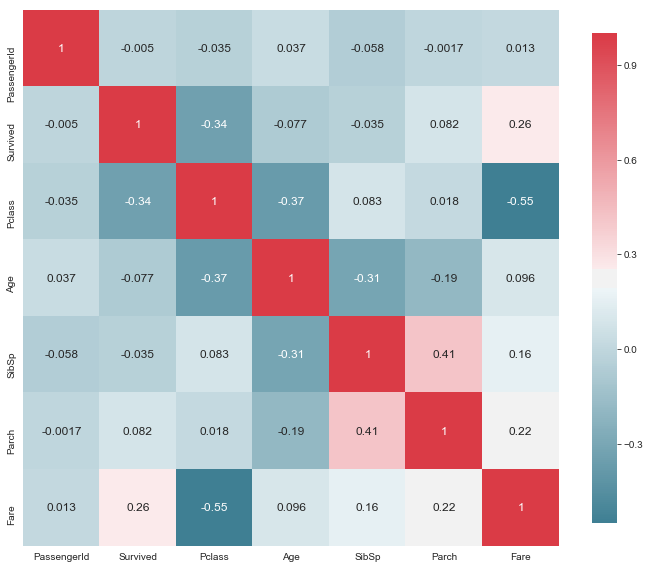

In [11]:
plot_correlation_map(titanic)

1. P class and Fare have negative correlation.
2. P class and Age have negative correlation.
3. Age and Survived have a strong negative correlation.
4. Age and Fare have a strong positive correlation.

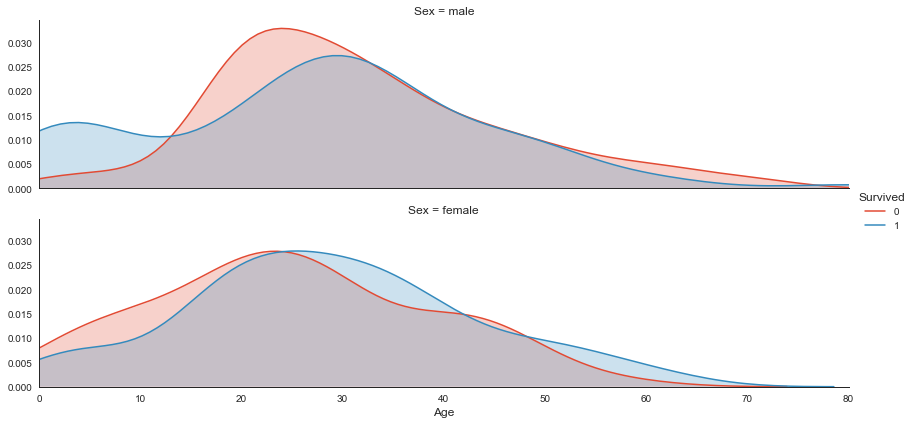

In [12]:
plot_distribution(titanic, var='Age', target='Survived', row='Sex')

1. Young people seemed to have survived more than old people.
2. Young females kids survived more as compared to young male kids.

C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


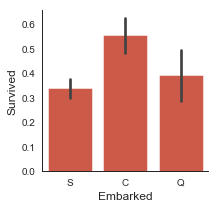

In [20]:
plot_categories(titanic, cat="Embarked", target='Survived')

S = Southampton,
C = Cherbourg, 
Q = Queenstown

1. Passengers who boarded from Cherboug survived the most.
2. Followed by who boarded from Queenstown then who boarded from Southampton.


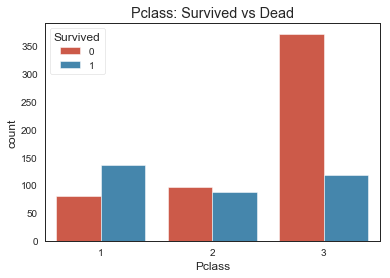

In [17]:
sns.countplot('Pclass',hue='Survived',data=titanic)
plt.title('Pclass: Survived vs Dead')
plt.show()

Passengers from Class 1 seemed to have been given higher preference at the time of rescuing because if u look at their survival rate it is way higher than other classes.

1. Class 1: Almsot 65-70% survived. (survival rate: Best)
2. Class 2: Survival to death ratio is 51% : 49% (approx)
3. Class 3: Almost 75% people of this class did not survive. (survival rate: Worst)

In [14]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='summer_r')

1. Women and children were given preference at the time of rescue.
2. Rate of survival among women is higher than men in every Pclass.

C:\Users\harsh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


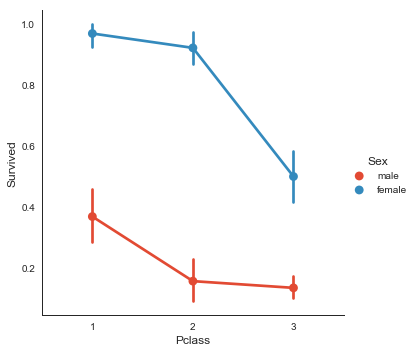

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic)
plt.show()

1. Mostly females from class 1 survived. (91 out of 94)
2. Females had a higher rate of survival in every class as compared to males.
3. Irrespective of the Pclass women were given a preference at the time of rescue.

<Figure size 1800x504 with 0 Axes>

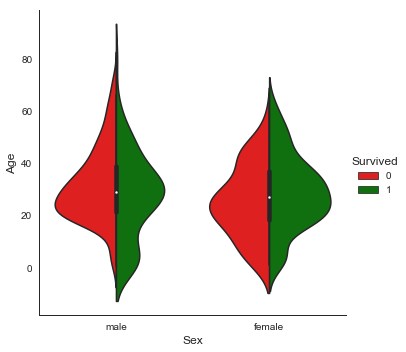

In [16]:
fig= plt.figure(figsize=(25,7))
sns.catplot(x='Sex',y='Age',hue='Survived',data=titanic,split=True,palette={0:'r',1:'g'},kind='violin')

 Women and children were given preference for survival at the time of rescue.

In [17]:
titanic_df=titanic.copy()

In [18]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic_df['Cabin'].value_counts()
titanic_df['Cabin'].fillna('None',inplace=True)
titanic_df['Cabin'].value_counts()

None           687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
C22 C26          3
F33              3
E101             3
D                3
C124             2
D36              2
E121             2
D17              2
D26              2
C2               2
E25              2
B28              2
C52              2
B22              2
C78              2
E8               2
B20              2
D35              2
B51 B53 B55      2
E33              2
F4               2
B77              2
D20              2
E24              2
E67              2
              ... 
C45              1
D49              1
E40              1
C128             1
C106             1
B38              1
B73              1
C110             1
B39              1
B71              1
A24              1
C101             1
E63              1
C99              1
B94              1
A31              1
C118             1
A16              1
A23              1
A10              1
A32              1
C47         

In [20]:
titanic_df['Age'].value_counts()
titanic_df['Age'].fillna('None',inplace=True)
titanic_df['Age'].value_counts()

None    177
24.0     30
22.0     27
18.0     26
30.0     25
28.0     25
19.0     25
21.0     24
25.0     23
36.0     22
29.0     20
35.0     18
27.0     18
26.0     18
32.0     18
31.0     17
16.0     17
20.0     15
23.0     15
34.0     15
33.0     15
39.0     14
17.0     13
42.0     13
40.0     13
45.0     12
38.0     11
50.0     10
4.0      10
2.0      10
       ... 
0.75      2
28.5      2
0.83      2
40.5      2
30.5      2
55.0      2
57.0      2
59.0      2
63.0      2
64.0      2
45.5      2
70.0      2
71.0      2
32.5      2
0.67      1
55.5      1
14.5      1
24.5      1
0.92      1
36.5      1
20.5      1
23.5      1
12.0      1
34.5      1
74.0      1
70.5      1
0.42      1
66.0      1
53.0      1
80.0      1
Name: Age, Length: 89, dtype: int64

In [21]:
titanic_df['Embarked'].value_counts()
titanic_df['Embarked'].fillna('None',inplace=True)
titanic_df['Embarked'].value_counts()

S       644
C       168
Q        77
None      2
Name: Embarked, dtype: int64

In [22]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
sex=pd.get_dummies(titanic_df.Sex, prefix='Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [24]:
embarked=pd.get_dummies(titanic_df.Embarked, prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [25]:
titanic_df_dummy1 = pd.concat([titanic_df, sex], axis=1)
titanic_df_dummy1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,None,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,None,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,None,S,0,1


In [26]:
titanic_df_dummy = pd.concat([titanic_df_dummy1, embarked], axis=1)
titanic_df_dummy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,None,S,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,None,S,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,None,S,0,1,0,0,0,1


In [27]:
obj1=titanic_df_dummy.dtypes==object
print(obj1)
print()
titanic_df_dummy=titanic_df_dummy.drop(titanic_df_dummy.columns[obj1],axis=1)
print(titanic_df_dummy.head())

PassengerId      False
Survived         False
Pclass           False
Name              True
Sex               True
Age               True
SibSp            False
Parch            False
Ticket            True
Fare             False
Cabin             True
Embarked          True
Sex_female       False
Sex_male         False
Embarked_C       False
Embarked_None    False
Embarked_Q       False
Embarked_S       False
dtype: bool

   PassengerId  Survived  Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            1         0       3      1      0   7.2500           0         1   
1            2         1       1      1      0  71.2833           1         0   
2            3         1       3      0      0   7.9250           1         0   
3            4         1       1      1      0  53.1000           1         0   
4            5         0       3      0      0   8.0500           0         1   

   Embarked_C  Embarked_None  Embarked_Q  Embarked_S  
0           0              0   

In [28]:
dep='Survived'
X=titanic_df_dummy.drop('Survived',axis=1)
Y=titanic_df_dummy['Survived']


In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , test_size=0.3, random_state=100)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(solver = 'liblinear')

In [32]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
lr.predict_proba(X_test)[:,1]

array([0.59919609, 0.62460686, 0.10184464, 0.79241624, 0.19377082,
       0.62599487, 0.07310223, 0.34305465, 0.93079333, 0.46196684,
       0.93834745, 0.10075666, 0.16761414, 0.59651587, 0.45675261,
       0.14680835, 0.89289659, 0.34530011, 0.13860098, 0.10104272,
       0.10130929, 0.95373147, 0.10111963, 0.643744  , 0.10149004,
       0.10127068, 0.68949109, 0.34917332, 0.10072668, 0.09327685,
       0.01838247, 0.7676452 , 0.34532925, 0.19306813, 0.88764574,
       0.08411   , 0.73201469, 0.91569761, 0.76391759, 0.10072697,
       0.5979118 , 0.94888314, 0.17086078, 0.06093006, 0.01837341,
       0.73372247, 0.10085585, 0.94289879, 0.1709006 , 0.92961355,
       0.10112778, 0.19366583, 0.0389871 , 0.10160227, 0.06945123,
       0.10083118, 0.10121633, 0.10745758, 0.12411006, 0.3474926 ,
       0.19114586, 0.14989104, 0.10135444, 0.09427597, 0.1926218 ,
       0.64339153, 0.10131722, 0.73986629, 0.76365933, 0.10122296,
       0.35509402, 0.10118702, 0.10129658, 0.6250951 , 0.10143

In [34]:
lr.predict_proba(X_test)[:,1]>.5,1,0

(array([ True,  True, False,  True, False,  True, False, False,  True,
        False,  True, False, False,  True, False, False,  True, False,
        False, False, False,  True, False,  True, False, False,  True,
        False, False, False, False,  True, False, False,  True, False,
         True,  True,  True, False,  True,  True, False, False, False,
         True, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False,  True,  True, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False,  True,  True,  True, False, False,  True, False, False,
        False,  True, False, False,  True,  True,  True,  True, False,
         True, False, False, False,  True, False,  True, False,  True,
         True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False,  True, False, False,  True,
      

In [35]:
y_pred = np.where(lr.predict_proba(X_test)[:,1]>.4,1,0)

In [36]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, roc_curve, auc, roc_auc_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [37]:
print('Accuracy is  :' ,accuracy)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)
print('Confusion Matrix is  :\n',cm)
print(TP,FP,FN,TN)

Accuracy is  : 0.7649253731343284
Precision is  : 0.7254901960784313
Recall is  : 0.6788990825688074
Roc Auc is  : 0.7513992268189948
Confusion Matrix is  :
 [[131  28]
 [ 35  74]]
131 28 35 74


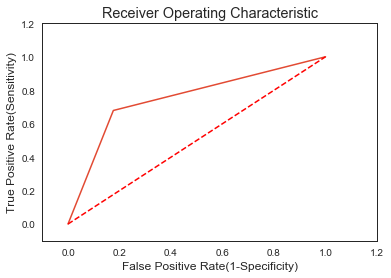

Area under the curve:  0.751


In [38]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

print("Area under the curve: ",round(auc(false_positive_rate, true_positive_rate),3))